## CS156A Final Exam
## Wilson Duan

### Problem 1.
Let $x = (x_1, x_2)$ be an arbitrary point in X. The linear transformation applied to $x$ results in a Z space expressed by $x_1^ix_2^j$ for all $i, j \geq 0$ such that $i + j \leq 10$ (except for $x_0 = 1$, which occurs when $i = j = 0$). Thus, to calculate the dimensionality of this Z space, we must count the number of $i, j$ pairs such that $i + j \leq 10$. This is a classic counting problem:

$i + j \leq 10$

$i + j + d = 10$

Using sticks and stones, the number of ways to divide $i, j, d$ to sum to 10 is ${{10 + 2} \choose 2} = {12 \choose 2} = 66$. We then subtract one since we do not count the constant coordinate $x_0 = 1$, giving us a total of 65 $i, j$ pairs. Therefore, the dimensionality of the Z space is 65, giving us the answer **e)**.

### Problem 2.
The logistic regression model could result in $\bar g \not\in H$. Since each hypothesis function in linear regression models comes in the form $f(x) = \frac{e^{ax + b}}{1 + e^{ax + b}}$, if we were to add multiple hypothesis functions, there is no guarantee that the resulting sum of the functions follows the same form $\frac{e^{ax + b}}{1 + e^{ax + b}}$, implying that $\bar g$ may not be a logistic regression function. As a result, the answer is **d)**.

### Problem 3.
Statement **d)** is false because comparing $(E_{out} - E_{in})$ does not always help you determine overfitting. Solely using $(E_{out} - E_{in})$ is not a good enough metric for overfitting, as we do not know if the difference $(E_{out} - E_{in})$ can be attributed to overfitting or another factor such as noisy test data. Thus, the answer is **d)**.

### Problem 4.
Statement **d)** is true because stochastic noise does not depend on the hypothesis set. Stochastic noise comes solely from the data, so it has no correlation with the hypothesis set, so the answer is **d)**.

### Problem 5.
Since $w_{lin}$ is the linear regression solution, we know $w_{lin}$ minimizes the mean squared error. Furthermore, since we have that $w_{lin}^T\Gamma^T\Gamma w_{lin} \leq C$, $w_{lin}$ satisfies both conditions given, so we know the regularized solution is $w_{reg} = w_{lin}$. Thus, the answer is **a)**.

### Problem 6.
When we use soft-order constraints to regularize polynomial models, we are minimizing mean squared error of the input data while adhering to the constraint $w^Tw \leq C$. By choosing the right regularization term $\lambda$, we can translate this to minimizing augmented error $E_{aug}(w) = E_{in}(w) + \frac{\lambda}{N}w^Tw$, so the answer is **b)**. 

### Problem 7.


In [13]:
import numpy as np
import random

In [14]:
train_data = []
test_data = []

with open("features.train", "r") as f:
    for line in f:
        line = line.strip().split()
        line = [float(x) for x in line]
        train_data.append(line)

with open("features.test", "r") as f:
    for line in f:
        line = line.strip().split()
        line = [float(x) for x in line]
        test_data.append(line)

train_data = np.array(train_data)
test_data = np.array(test_data)

In [15]:
def transform_data(data, k):
    output = np.zeros((len(data), k + 1))
    for i in range(len(data)):
        x1, x2 = data[i]
        output[i] = [1, x1, x2, x1*x2, x1**2, x2**2][:k + 1]
    return output

def linear_regression(X, y):
    inversed = np.linalg.inv(X.transpose().dot(X))
    w = inversed.dot(X.transpose()).dot(y)
    return w

def linear_regression_decay(X, y, lmbda):
    inversed = np.linalg.inv(X.transpose().dot(X) + lmbda * np.eye(X.shape[1]))
    w = inversed.dot(X.transpose()).dot(y)
    return w

def calculate_error(X, y, w):
    predictions = np.sign(X.dot(w))
    return np.mean(predictions != y)

In [16]:
def one_vs_all(y, label):
    output = []
    for i in range(len(y)):
        if (y[i] == label):
            output.append(1.0)
        else:
            output.append(-1.0)
    return np.array(output)

def one_vs_one(X, y, label1, label2):
    X_output = []
    y_output = []
    for (features, label) in zip(X, y):
        if (label == label1):
            X_output.append(features)
            y_output.append(1.0)
        elif (label == label2):
            X_output.append(features)
            y_output.append(-1.0)
    return np.array(X_output), np.array(y_output)

In [17]:
lmbda = 1
X_train, y_train = train_data[:, 1:], train_data[:, 0]
X_test, y_test = test_data[:, 1:], test_data[:, 0]

# add constant to X
X_train = transform_data(X_train, 2)
X_test = transform_data(X_test, 2)

for i in range(5, 10):
    y_train_temp = one_vs_all(np.copy(y_train), i)
    y_test_temp = one_vs_all(np.copy(y_test), i)

    w = linear_regression_decay(X_train, y_train_temp, lmbda)
    e_in = calculate_error(X_train, y_train_temp, w)
    print(f'E_in for {i} versus all: ', e_in)

E_in for 5 versus all:  0.07625840076807022
E_in for 6 versus all:  0.09107118365107666
E_in for 7 versus all:  0.08846523110684405
E_in for 8 versus all:  0.07433822520916199
E_in for 9 versus all:  0.08832807570977919


According to the code output above, the classifier with the lowest $E_{in}$ is 8 versus all, so the answer is **d)**.

### Problem 8.

In [18]:
lmbda = 1.0
X_train, y_train = train_data[:, 1:], train_data[:, 0]
X_test, y_test = test_data[:, 1:], test_data[:, 0]

# apply feature transform
X_train = transform_data(X_train, 5)
X_test = transform_data(X_test, 5)

for i in range(5):
    y_train_temp = one_vs_all(np.copy(y_train), i)
    y_test_temp = one_vs_all(np.copy(y_test), i)

    w = linear_regression_decay(X_train, y_train_temp, lmbda)
    e_out = calculate_error(X_test, y_test_temp, w)
    print(f'E_out for {i} versus all: ', e_out)

E_out for 0 versus all:  0.10662680617837568
E_out for 1 versus all:  0.02192326856003986
E_out for 2 versus all:  0.09865470852017937
E_out for 3 versus all:  0.08271051320378675
E_out for 4 versus all:  0.09965122072745392


According to the code output above, the classifier with the lowest $E_{out}$ is 1 versus all, so the answer is **b)**.

### Problem 9.

In [19]:
lmbda = 1
X_train, y_train = train_data[:, 1:], train_data[:, 0]
X_test, y_test = test_data[:, 1:], test_data[:, 0]

# add constant
X_train_normal = transform_data(X_train, 2)
X_test_normal = transform_data(X_test, 2)

# apply feature transform
X_train_transform = transform_data(X_train, 5)
X_test_transform = transform_data(X_test, 5)

for i in range(10):
    y_train_temp = one_vs_all(np.copy(y_train), i)
    y_test_temp = one_vs_all(np.copy(y_test), i)
    
    w_normal = linear_regression_decay(X_train_normal, y_train_temp, lmbda)
    w_transform = linear_regression_decay(X_train_transform, y_train_temp, lmbda)

    e_in_normal = calculate_error(X_train_normal, y_train_temp, w_normal)
    e_in_transform = calculate_error(X_train_transform, y_train_temp, w_transform)

    e_out_normal = calculate_error(X_test_normal, y_test_temp, w_normal)
    e_out_transform = calculate_error(X_test_transform, y_test_temp, w_transform)

    print(f'E_in for {i} versus all with and without transform', e_in_normal, e_in_transform)
    print(f'E_out for {i} versus all with and without transform', e_out_normal, e_out_transform)
    print()

E_in for 0 versus all with and without transform 0.10931285146070498 0.10231792621039638
E_out for 0 versus all with and without transform 0.11509715994020926 0.10662680617837568

E_in for 1 versus all with and without transform 0.01522424907420107 0.012343985735838706
E_out for 1 versus all with and without transform 0.02242152466367713 0.02192326856003986

E_in for 2 versus all with and without transform 0.10026059525442327 0.10026059525442327
E_out for 2 versus all with and without transform 0.09865470852017937 0.09865470852017937

E_in for 3 versus all with and without transform 0.09024825126868742 0.09024825126868742
E_out for 3 versus all with and without transform 0.08271051320378675 0.08271051320378675

E_in for 4 versus all with and without transform 0.08942531888629818 0.08942531888629818
E_out for 4 versus all with and without transform 0.09965122072745392 0.09965122072745392

E_in for 5 versus all with and without transform 0.07625840076807022 0.07625840076807022
E_out for 

According to the code output above, the transform improves the out of sample performance of the 5 versus all classifier, but by less than 5%. Therefore, the answer is **e)**.

### Problem 10.

In [33]:
lmbda1 = 1
lmbda2 = 0.01
X_train, y_train = train_data[:, 1:], train_data[:, 0]
X_test, y_test = test_data[:, 1:], test_data[:, 0]

# apply feature transform
X_train = transform_data(X_train, 5)
X_test = transform_data(X_test, 5)

X_train, y_train = one_vs_one(X_train, y_train, 1, 5)
X_test, y_test = one_vs_one(X_test, y_test, 1, 5)

w1 = linear_regression_decay(X_train, y_train, lmbda1)
w2 = linear_regression_decay(X_train, y_train, lmbda2)

e_in1 = calculate_error(X_train, y_train, w1)
e_in2 = calculate_error(X_train, y_train, w2)

e_out1 = calculate_error(X_test, y_test, w1)
e_out2 = calculate_error(X_test, y_test, w2)

print('lambda = 1:')

print(f'E_in for 1 vs 5:', e_in1)
print(f'E_out for 1 vs 5:', e_out1)

print('lambda = 0.01:')

print(f'E_in for 1 vs 5:', e_in2)
print(f'E_out for 1 vs 5:', e_out2)

lambda = 1:
E_in for 1 vs 5: 0.005124919923126201
E_out for 1 vs 5: 0.025943396226415096
lambda = 0.01:
E_in for 1 vs 5: 0.004484304932735426
E_out for 1 vs 5: 0.02830188679245283


According to the code output above, when we decrease $\lambda$ from 1 to 0.01, $E_{in}$ decreases and $E_{out}$ increases, indicating that overfitting occurs. Thus, the answer is **a)**.

### Problem 11.

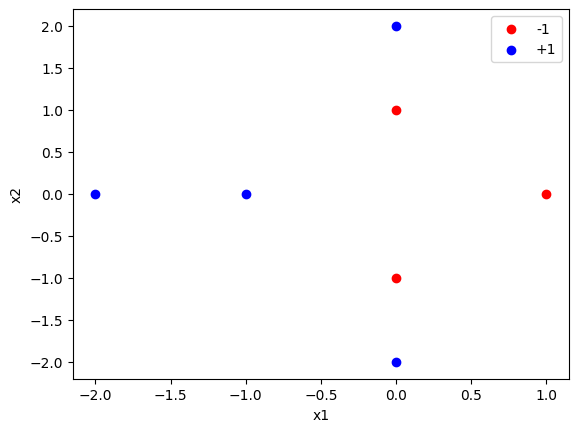

In [21]:
import matplotlib.pyplot as plt

points = np.array([[1, 0], [0, 1], [0, -1], [-1, 0], [0, 2], [0, -2], [-2, 0]])
labels = [-1, -1, -1, 1, 1, 1, 1]

plt.scatter(points[:3, 0], points[:3, 1], c='r', label='-1')
plt.scatter(points[3:, 0], points[3:, 1], c='b', label='+1')
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

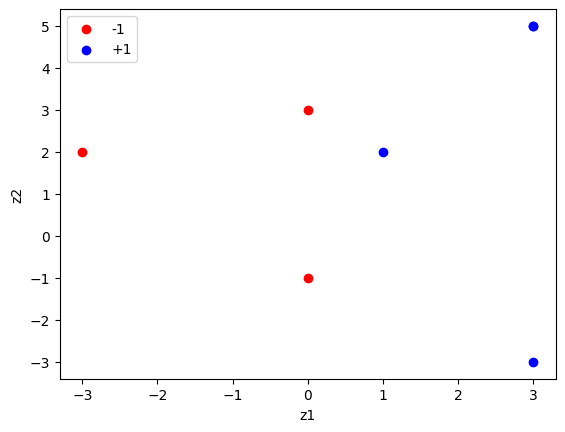

In [22]:
def transform_points(points):
    output = []
    for (x1, x2) in points:
        z1 = x2 ** 2 - 2 * x1 - 1
        z2 = x1 ** 2 - 2 * x2 + 1
        output.append([z1, z2])
    return np.array(output)

z_points = transform_points(points)
plt.scatter(z_points[:3, 0], z_points[:3, 1], c='r', label='-1')
plt.scatter(z_points[3:, 0], z_points[3:, 1], c='b', label='+1')
plt.legend()
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Looking at the graph above, it is clear that the vertical line $x = 0.5$ would maximize the margin in the Z space. The weights for a vertical line are $w_1 = 1$, $w_2 = 0$, and $b = -0.5$, so the answer is **c)**.

### Problem 12.

In [23]:
from sklearn import svm
import math

clf = svm.SVC(C = 10e20, kernel='poly', degree=2, coef0=1)
clf.fit(points, labels)
print(len(clf.support_))

5


According to the code output above, the number of support vectors is 5, so the answer is **c)**.

### Problem 13.

In [24]:
# Define a set of helper functions
def random_point():
    x = random.random() * 2 - 1
    y = random.random() * 2 - 1
    return (x, y)

def f(x1, x2):
    return np.sign(x2 - x1 + 0.25 * math.sin(math.pi * x1))

def create_dataset(n):
    X = []
    y = []
    for i in range(n):
        a, b = random_point()
        X.append([a, b])
        y.append(f(a, b))
    return np.array(X), np.array(y)

In [25]:
N_data = 100
N_simulations = 1000

non_separable = 0
for i in range(N_simulations):
    X, y = create_dataset(N_data)

    clf = svm.SVC(C = 10e20, kernel='rbf', gamma=1.5, coef0=1)
    clf.fit(X, y)

    if (clf.score(X, y) != 1):
        non_separable += 1

non_separable /= N_simulations
non_separable

0.0

According to the code output above, the data is non-separable by RBF less than 5% of the time, so the answer is **a)**.

### Problem 14.

In [26]:
def kernel(x, mu, gamma):
    return np.exp(-gamma * np.sum((x - mu) ** 2))

def get_centers(X, clusters):
    centers = []
    for i in range(clusters):
        centers.append(random_point())
    centers = np.array(centers)

    prev_centers = centers.copy()
    while (True):
        # assign closest
        points_by_cluster = [[] for k in range(clusters)]
        for x in X:
            x1, x2 = x
            closest_cluster = -1
            smallest_dist = 1000
            for k in range(clusters):
                mu1, mu2 = centers[k]
                dist = math.sqrt((x1 - mu1) ** 2 + (x2 - mu2) ** 2)
                if (dist < smallest_dist):
                    smallest_dist = dist
                    closest_cluster = k
            points_by_cluster[closest_cluster].append(x)

        # change centers to be mean
        for k in range(clusters):
            if (len(points_by_cluster[k]) == 0):
                return get_centers(X, clusters)
            cluster_points = np.array(points_by_cluster[k])
            centers[k][0] = np.mean(cluster_points[:, 0])
            centers[k][1] = np.mean(cluster_points[:, 1])

        if ((prev_centers == centers).all()):
            break
        prev_centers = centers.copy()
    return centers

def get_features(X, centers, gamma):
    output = []
    for x in X:
        features = [1]
        for k in range(len(centers)):
            features.append(kernel(x, centers[k], gamma))
        output.append(features)
    return np.array(output)

def train_lloyds(X, y, clusters, gamma):
    centers = get_centers(X, clusters)

    X_features = get_features(X, centers, gamma)
    w = linear_regression(X_features, y)
    return w, centers

def evaluate_lloyds(X, y, w, centers, gamma):
    X_features = get_features(X, centers, gamma)
    pred = np.sign(np.dot(X_features, w))
    error = np.mean(pred != y)
    return error

In [27]:
N_test = 1000
N_simulations = 100
K = 9
gamma = 1.5

non_separable = 0
kernel_better = 0
for i in range(N_simulations):
    X_train, y_train = create_dataset(N_data)
    X_test, y_test = create_dataset(N_test)

    # regular rbf
    w, centers = train_lloyds(X_train, y_train, K, gamma)
    e_out_lloyds = evaluate_lloyds(X_test, y_test, w, centers, gamma)

    # svm
    clf = svm.SVC(C = 10e20, kernel='rbf', gamma=gamma, coef0=1)
    clf.fit(X_train, y_train)
    if (clf.score(X_train, y_train) != 1):
        non_separable += 1
    e_out_svm = 1 - clf.score(X_test, y_test)
    kernel_better += int(e_out_svm < e_out_lloyds)

valid_simulations = N_simulations - non_separable
kernel_better /= valid_simulations
kernel_better

0.91

According to the code output above, the kernel form beats the regular form about 91% of the time, so the answer is **e)**.

### Problem 15.

In [28]:
N_test = 1000
N_simulations = 100
K = 12
gamma = 1.5

non_separable = 0
kernel_better = 0
for i in range(N_simulations):
    X_train, y_train = create_dataset(N_data)
    X_test, y_test = create_dataset(N_test)

    # regular rbf
    w, centers = train_lloyds(X_train, y_train, K, gamma)
    e_out_lloyds = evaluate_lloyds(X_test, y_test, w, centers, gamma)

    # svm
    clf = svm.SVC(C = 10e20, kernel='rbf', gamma=gamma, coef0=1)
    clf.fit(X_train, y_train)
    if (clf.score(X_train, y_train) != 1):
        non_separable += 1
    e_out_svm = 1 - clf.score(X_test, y_test)
    kernel_better += int(e_out_svm < e_out_lloyds)

valid_simulations = N_simulations - non_separable
kernel_better /= valid_simulations
kernel_better

0.81

According to the code output above, the kernel form beats the regular form about 81% of the time, so the answer is **d)**.

### Problem 16.

In [29]:
N_test = 1000
N_simulations = 100
K1 = 9
K2 = 12
gamma = 1.5

E_in_decreased = 0
E_out_decreased = 0
for i in range(N_simulations):
    X_train, y_train = create_dataset(N_data)
    X_test, y_test = create_dataset(N_test)

    w1, centers1 = train_lloyds(X_train, y_train, K1, gamma)
    w2, centers2 = train_lloyds(X_train, y_train, K2, gamma)

    # get error
    E_in1 = evaluate_lloyds(X_train, y_train, w1, centers1, gamma)
    E_out1 = evaluate_lloyds(X_test, y_test, w1, centers1, gamma)

    E_in2 = evaluate_lloyds(X_train, y_train, w2, centers2, gamma)
    E_out2 = evaluate_lloyds(X_test, y_test, w2, centers2, gamma)

    if (E_in2 < E_in1):
        E_in_decreased += 1
    if (E_out2 < E_out1):
        E_out_decreased += 1
E_in_decreased /= N_simulations
E_out_decreased /= N_simulations
E_in_decreased, E_out_decreased

(0.61, 0.7)

According to the code output above, $E_{in}$ and $E_{out}$ both decrease most of the time. Thus, the answer is **d)**.

### Problem 17.

In [30]:
N_test = 1000
N_simulations = 100
K = 9
gamma1 = 1.5
gamma2 = 2

E_in_decreased = 0
E_out_decreased = 0
for i in range(N_simulations):
    X_train, y_train = create_dataset(N_data)
    X_test, y_test = create_dataset(N_test)

    w1, centers1 = train_lloyds(X_train, y_train, K, gamma1)
    w2, centers2 = train_lloyds(X_train, y_train, K, gamma2)

    # get error
    E_in1 = evaluate_lloyds(X_train, y_train, w1, centers1, gamma1)
    E_out1 = evaluate_lloyds(X_test, y_test, w1, centers1, gamma1)

    E_in2 = evaluate_lloyds(X_train, y_train, w2, centers2, gamma2)
    E_out2 = evaluate_lloyds(X_test, y_test, w2, centers2, gamma2)

    if (E_in2 < E_in1):
        E_in_decreased += 1
    if (E_out2 < E_out1):
        E_out_decreased += 1
E_in_decreased /= N_simulations
E_out_decreased /= N_simulations
E_in_decreased, E_out_decreased

(0.25, 0.41)

According to the code output above, both $E_{in}$ and $E_{out}$ do not decrease most of the time, meaning they increase most of the time, so the answer is **c)**.

### Problem 18.

In [31]:
N_test = 1000
N_simulations = 100
K = 9
gamma = 1.5

e_in_zero = 0
for i in range(N_simulations):
    X_train, y_train = create_dataset(N_data)
    X_test, y_test = create_dataset(N_test)

    # regular rbf
    w, centers = train_lloyds(X_train, y_train, K, gamma)
    e_in_lloyds = evaluate_lloyds(X_train, y_train, w, centers, gamma)
    if (e_in_lloyds == 0):
        e_in_zero += 1

e_in_zero /= N_simulations
e_in_zero

0.05

According to the code output above, $E_{in}$ is zero 5% of the time, so the answer is **a)**.

### Problem 19.
Let $I$ denote the event that our singular sample had a heart attack. By Bayes Theorem,

$P(h = f \mid I) = \frac{P(I \mid h = f)P(h = f)}{P(I)}$

We know that $P(I)$ is a constant, so we can ignore it. We are given that $P(h = f)$ is uniform over [0, 1]. Looking at $P(I \mid h = f)$, it is evident that as $h$ increases, the probability of a heart attack increases, so $P(I \mid h = f)$ increases linearly. As a result, the product of $P(I \mid h = f)$ and $P(h = f)$ results in a posterior that increases linearly over [0, 1]. Thus, the answer is **b)**.

### Problem 20.

$E_{out}(g) = E_{out}(\frac{1}{2}(g_1(x) + g_2(x)))$

$E_{out}(g) = E[(\frac{1}{2}(g_1(x) + g_2(x)) - y)^2]$

$E_{out}(g) = \frac{1}{4}E[(g_1(x) + g_2(x) - 2y)^2]$

$E_{out}(g) = \frac{1}{4}E[g_1(x)^2 + g_2(x)^2 - 4yg_1(x) - 4yg_2(x) + 2g_1(x)g_2(x) + 4y^2]$

$E_{out}(g) = \frac{1}{2}E[\frac{1}{2}g_1(x)^2 + \frac{1}{2}g_2(x)^2 - 2yg_1(x) - 2yg_2(x) + g_1(x)g_2(x) + 2y^2]$

$E_{out}(g) = \frac{1}{2}E[(g_1(x) - y)^2 + (g_2(x) - y)^2 - \frac{1}{2}g_1(x)^2 - \frac{1}{2}g_2(x)^2 + g_1(x)g_2(x)]$

$E_{out}(g) = \frac{E_{out}(g1) + E_{out}(g2)}{2} - \frac{1}{2}E[\frac{1}{2}g_1(x)^2 + \frac{1}{2}g_2(x)^2 - g_1(x)g_2(x)]$

$E_{out}(g) = \frac{E_{out}(g1) + E_{out}(g2)}{2} - \frac{1}{4}E[g_1(x)^2 + g_2(x)^2 - 2g_1(x)g_2(x)]$

$E_{out}(g) = \frac{E_{out}(g1) + E_{out}(g2)}{2} - \frac{1}{4}E[(g_1(x)-g_2(x))^2]$

Since $E[(g_1(x)-g_2(x))^2]$ is always greater than or equal to zero, it follows that 

$E_{out}(g) \leq \frac{E_{out}(g1) + E_{out}(g2)}{2}$

Thus, the answer is **c)**.